## ①画像の読み込み

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

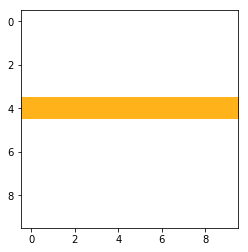

In [80]:
img = cv2.imread("/Users/facul/Pictures/reseach_image/color_entropy/color_entoropy_4.png")
plt.imshow(img)  #貼り付け
plt.show()       #表示

## ②着目座標の検出, リスト化

In [78]:
#画像の大きさを取得
width = img.shape[0] 
height = img.shape[1]
print(width, height)  #OK

#カラーチャネルを分離する.
img_blue, img_green, img_red = cv2.split(img)
print(img_red)

#着目色の座標リストを作成
zahyo = []

#各座標に於いて, 指定した色ならリストに入れる工程
#なお, 上のオレンジ色は,(R, G, B)=(255, 170, 0)
for wi in range(width):
    for he in range(height):
        if img_red[wi, he] == 25:
            zahyo.append([wi, he])
print(zahyo) #OK           

10 10
[[255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [ 25  25  25  25  25  25  25  25  25  25]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255]]
[[4, 0], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [4, 7], [4, 8], [4, 9]]


## ③リスト内の組を総当たりで距離計算

In [79]:
#まずはリストの組数を調べる. 組数=行数だ.
data = len(zahyo)
print("データ数は"+str(data))       #OK

#総合計の変数を作成
total_distance = 0

for i in range(data):
    for j in range(data):
        add = ((zahyo[i][0]-zahyo[j][0])**2 + (zahyo[i][1]-zahyo[j][1])**2)**0.5
        print("["+str(zahyo[i][0])+","+str(zahyo[i][1])+"]と["+str(zahyo[j][0])+","+str(zahyo[j][1])+"]の距離は"+str('{:.2f}'.format(add))+"である.")
        total_distance += add
        
print("総合計は"+str(total_distance)+"である.") #OK        

データ数は10
[4,0]と[4,0]の距離は0.00である.
[4,0]と[4,1]の距離は1.00である.
[4,0]と[4,2]の距離は2.00である.
[4,0]と[4,3]の距離は3.00である.
[4,0]と[4,4]の距離は4.00である.
[4,0]と[4,5]の距離は5.00である.
[4,0]と[4,6]の距離は6.00である.
[4,0]と[4,7]の距離は7.00である.
[4,0]と[4,8]の距離は8.00である.
[4,0]と[4,9]の距離は9.00である.
[4,1]と[4,0]の距離は1.00である.
[4,1]と[4,1]の距離は0.00である.
[4,1]と[4,2]の距離は1.00である.
[4,1]と[4,3]の距離は2.00である.
[4,1]と[4,4]の距離は3.00である.
[4,1]と[4,5]の距離は4.00である.
[4,1]と[4,6]の距離は5.00である.
[4,1]と[4,7]の距離は6.00である.
[4,1]と[4,8]の距離は7.00である.
[4,1]と[4,9]の距離は8.00である.
[4,2]と[4,0]の距離は2.00である.
[4,2]と[4,1]の距離は1.00である.
[4,2]と[4,2]の距離は0.00である.
[4,2]と[4,3]の距離は1.00である.
[4,2]と[4,4]の距離は2.00である.
[4,2]と[4,5]の距離は3.00である.
[4,2]と[4,6]の距離は4.00である.
[4,2]と[4,7]の距離は5.00である.
[4,2]と[4,8]の距離は6.00である.
[4,2]と[4,9]の距離は7.00である.
[4,3]と[4,0]の距離は3.00である.
[4,3]と[4,1]の距離は2.00である.
[4,3]と[4,2]の距離は1.00である.
[4,3]と[4,3]の距離は0.00である.
[4,3]と[4,4]の距離は1.00である.
[4,3]と[4,5]の距離は2.00である.
[4,3]と[4,6]の距離は3.00である.
[4,3]と[4,7]の距離は4.00である.
[4,3]と[4,8]の距離は5.00である.
[4,3]と[4,9]の距離は6.00である.
[4,4]と[4,0]の距離は4.00である.
[4,4]と[4

## ④データ数で平均化する

In [66]:
#データを (n^2 - n)で割ると１組あたりの距離になる.

ave_distance = total_distance / (data**2 - data)
print('{:.2f}'.format(ave_distance))

3.67


## コードまとめ

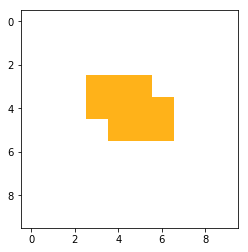

1.78


In [74]:
zahyo = []
total_distance = 0

img = cv2.imread("/Users/facul/Pictures/reseach_image/color_entropy/color_entoropy_5.png")
plt.imshow(img)  #貼り付け
plt.show()       #表示

width = img.shape[0] 
height = img.shape[1]

img_blue, img_green, img_red = cv2.split(img)
for wi in range(width):
    for he in range(height):
        if img_red[wi, he] != 255:
            zahyo.append([wi, he])

data = len(zahyo)
for i in range(data):
    for j in range(data):
        add = ((zahyo[i][0]-zahyo[j][0])**2 + (zahyo[i][1]-zahyo[j][1])**2)**0.5
        total_distance += add
        
ave_distance = total_distance / (data**2 - data)
print('{:.2f}'.format(ave_distance))